ITERATIVE FUNCTION

#We have the NU as the input, and it returns Y as the output. So we want to iterate that but changing the NU

In [ ]:
import numpy as np
import copy
from itertools import product
import scipy as sp
import pylab as plt
import os
from scipy.stats import gamma

from DMF_model import DMF_sim, DMF_parameters
path=os.getcwd()

def HRF(times):
    """ Return values for HRF at given times """
    # Gamma pdf for the peak
    peak_values = gamma.pdf(times, 6)
    # Gamma pdf for the undershoot
    undershoot_values = gamma.pdf(times, 12)
    # Combine them
    values = peak_values - 0.35 * undershoot_values
    # Scale max to 0.6
    return values / np.max(values) * 0.6    
    
    # DMF parameters
P = {}
P = DMF_parameters(P)
P['sigma'] = 0.002  # no noise

T  = 5     # simulation time
dt = 1e-4   # integration step
P['T'] = T

# layer specific external input
stim_start = int(2/dt)    # start of stimulation
stim_end   = int(5/dt)    # end of stimulation

# Define the possible values for each input intensity.
valuesI = [50, 100, 150]
#valuesI = [200, 250, 300] ALEX/ANG
valuesLayer = range(8)

# Create an array of all possible combinations for each input
input_combinations = list(product(valuesI, repeat=2))
layer_combinations = list(product(valuesLayer, repeat=2))

# Create the registry for the actual input combinations, that is, input_combinations + noise.
noisy_input_combinations = np.zeros((len(input_combinations),1))

# Create folder to store the results
folder = "COMBIS"
folder_path = os.path.join(os.getcwd(), folder)
if not os.path.exists(folder_path):
    os.mkdir(folder_path)

#index of input and layer combination
size=len(input_combinations)*len(layer_combinations)
index_in=(np.zeros((size,2)))
index_lay=(np.zeros((size,2)))

count=0

# The Loop
for i in range(len(input_combinations)):
    T_results=np.zeros((len(layer_combinations),int((T/dt)-1/dt),P['M']))
                       
    # Update the U array based on the current population_combinations
    U = np.zeros((int(T/dt), P['M']))
    current_input_combination = input_combinations[i]    
                       
    for j in range(len(layer_combinations)):
        current_layer_combination = layer_combinations[j]
        noisy_current_input_combination = (round(np.random.uniform((current_input_combination[0]-50),(current_input_combination[0]+50)),3),round(np.random.uniform((current_input_combination[1]-50),(current_input_combination[1]+50)),3))
        U[stim_start:stim_end, current_layer_combination[0]] = noisy_current_input_combination[0]
        U[stim_start:stim_end, current_layer_combination[1]] = noisy_current_input_combination[1] #uniformly distributed noise around the selected input value, cut the decimals at 3
        index_in[count,:] = noisy_current_input_combination
        index_lay[count,:] = (current_layer_combination[0],current_layer_combination[1])
        count=count+1
        # Simulate
        I, H, F = DMF_sim(U, P)     # I - input current, H - membrane potential, F - firing rate
        Y = I[int(1/dt):, :]   # deviation from baseline during stimulation (and remove initial transient)

        # Append the Y values to the results
        T_results[j,:,:] = Y
    # Export the array after each combination and delete them                   
    T_array=np.array(T_results) 
    file_name = 'COMBIN{}.npy'.format(i)
    file_path = os.path.join(folder_path, file_name)
    np.save(file_path, T_array)

index=np.concatenate((index_in,index_lay),axis=1)
file_name = 'index.npy'
file_path = os.path.join(folder_path, file_name)
np.save(file_path, index)
    # Bring em all together in the end & Save the registry of actual inputs.

In [24]:
print(count)
index_A=(np.zeros((10,2)))
index_B=(np.ones((10,2)))
         
index= np.concatenate((index_A,index_B),axis=1)

print(index)
#print(index[0,0])

335
[[0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


In [ ]:
from itertools import product
import numpy as np
import copy
from itertools import product
import scipy as sp
import pylab as plt
import os
from scipy.stats import gamma

from DMF_model import DMF_sim, DMF_parameters
path=os.getcwd()
valuesI = [50, 100, 150, 200, 250, 300]
input_combinations = list(product(valuesI, repeat=2))
noisy_input_combinations = np.zeros((len(input_combinations),2))
# print(noisy_input_combinations)
noisy_input_combinations.shape

In [ ]:
from itertools import product

valuesI = [50, 100, 150, 200, 250, 300]
input_combinations = list(product(valuesI, repeat=2))
a = list(input_combinations)
b = len(a)
c = input_combinations[3]
U = [0]*40
for i in range(len(input_combinations)):
    U[i] = input_combinations[i]
    
print(a[3])

In [ ]:
Y_results_array.shape

In [13]:
#BASELINE SIMULATION:

T  = 30     # simulation time
dt = 1e-4   # integration step
P['T'] = T

# layer specific external input
stim_start = int(28/dt)    # start of stimulation
stim_end   = int(29/dt)    # end of stimulation

    # Baseline inputs (no inputs)
input_baseline = (0,0)
layer_baseline = (0,0)
    
    # Simulate
    
T_results=np.zeros((1,int(T/dt),P['M']))
U = np.zeros((int(T/dt), P['M']))

U[stim_start:stim_end, layer_baseline[0]] = input_baseline[0]
U[stim_start:stim_end, layer_baseline[1]] = input_baseline[1]
I, H, F = DMF_sim(U, P)     # I - input current, H - membrane potential, F - firing rate
Y_b = I[int(1/dt):, :] #- np.mean(I[int(0.5/dt):int(1/dt), :], axis=0)  # deviation from baseline during stimulation (and remove initial transient)
#Y = (Y - np.min(Y)) / (np.max(Y) - np.min(Y)) * 2 - 1  # normalize Y between -1 and 1


#export BASELINE array
baseline_array=np.array(Y_b) 
folder_path = "{}/COMBIS".format(path)
file_name = 'baseline.npy'.format(i)
file_path = os.path.join(folder_path, file_name)
np.save(file_path, baseline_array)


(0.0, 39999.0)

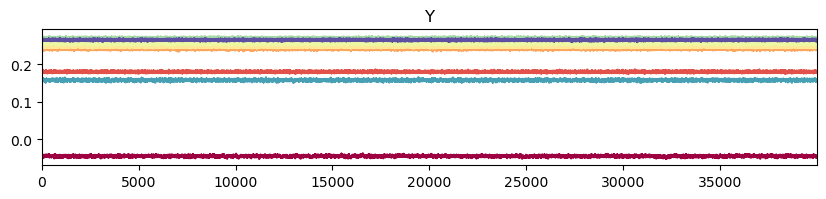

In [14]:
populations = np.array(['L23E', 'L23I', 'L4E', 'L4I', 'L5E', 'L5I', 'L6E', 'L6I'])
colors      = plt.cm.Spectral(np.linspace(0, 1, len(populations)))
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Spectral(np.linspace(0, 1, 8))))
plt.title('Y')
plt.plot(Y_b)
plt.xlim([0, len(Y)-1])

Current: NU, more combinations. input ranges from 0 to 300 in incrememnts of possibly 25mA? add noise with the same combinations, sample around the value of th einput (randomly sampled as a normal distribution), 

Alex's notes:
- The recording matrix needs three dimensions. Condition, Layer and Timestep of the simulation. 
- Start from 0 firing rate to 300. The intensity should be from 50 to 300 picoA.

- Simulating each condition severlat times.


Ang's notes:
- 2-3 BASELINE INPUT (NO INPUT) - 10 SECOND INPUT - 30S BASELINE
- i simulated the baseline and saved it. PLOT IT TO SEE IF ITS TRULLY NO INPUT
- append the baseline array at the end if it works

- is the input value (with noise) being saved?
